# 3. Semantic Segmentation

In [ ]:
import torch
from torchvision import transforms
import PIL.Image
import matplotlib.pyplot as plt

# load deeplab
model = torch.hub.load('pytorch/vision', 'deeplabv3_resnet101', pretrained=True)
model.eval()

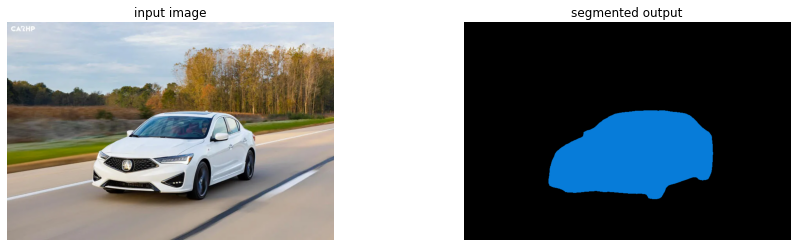

In [ ]:
# load the input image and preprocess
input_image = PIL.Image.open('245407bb24e2b793995bf9158e3cde92.webp')
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) 

# move the input and model to GPU if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions
r = PIL.Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

f, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].set_title('input image')
ax[0].axis('off')
ax[0].imshow(input_image)
ax[1].set_title('segmented output')
ax[1].axis('off')
ax[1].imshow(r)
plt.savefig("segmented_output.png", bbox_inches='tight')
# plt.show()